# ArcGIS Python API - List all web maps apps and layers

In [17]:
from arcgis import *
from IPython.display import display
import pandas as pd
import getpass

In [22]:
username = getpass.getpass()

········


In [23]:
password = getpass.getpass()

········


In [24]:
gis = GIS("https://mpi.maps.arcgis.com", username, password)

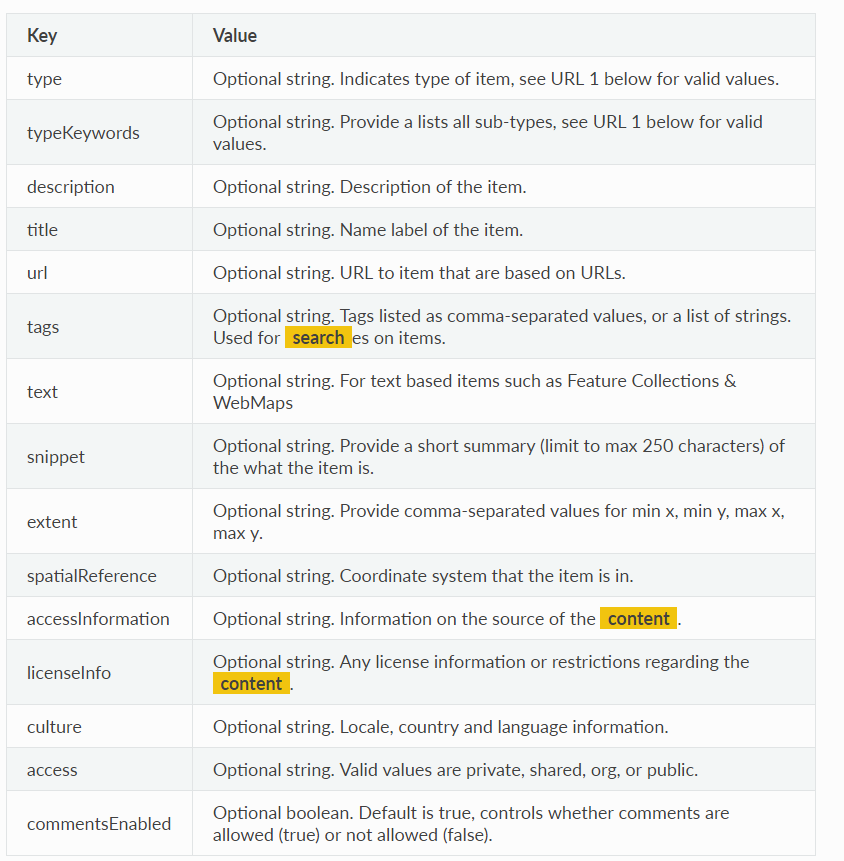

In [87]:
import datetime
MPI_AGOL_items = gis.content.search("", item_type = "", max_items=10000, outside_org = False)
print(MPI_AGOL_items[0].folder)
items_arr = []
for i in MPI_AGOL_items:
    items_arr.append([i.id,i.title,i.owner,datetime.datetime.fromtimestamp(i.created / 1e3),datetime.datetime.fromtimestamp(i.modified / 1e3),i.access,i.description,i.snippet,i.spatialReference,i.accessInformation,i.licenseInfo,i.type,i.url,i.tags,i.numViews])
#print(items_arr[0])    

In [88]:
items_df = pd.DataFrame(items_arr,columns=["id","title","owner","created","modified","access","description","snippet","spatialReference","accessInformation","licenseInfo","type","url","tags","numViews"])

In [89]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 15 columns):
id                   3214 non-null object
title                3214 non-null object
owner                3214 non-null object
created              3214 non-null datetime64[ns]
modified             3214 non-null datetime64[ns]
access               3214 non-null object
description          2092 non-null object
snippet              2547 non-null object
spatialReference     468 non-null object
accessInformation    1786 non-null object
licenseInfo          1699 non-null object
type                 3214 non-null object
url                  2270 non-null object
tags                 3214 non-null object
numViews             3214 non-null int64
dtypes: datetime64[ns](2), int64(1), object(12)
memory usage: 376.7+ KB


In [90]:
items_df.head()

,id,title,owner,created,modified,access,description,snippet,spatialReference,accessInformation,licenseInfo,type,url,tags,numViews
0,38cf1c6a0f284e2cab6baaa91da22f46,AGOL_PeaWeevil_Collector_TrapCrops,Alana.Corney_MPI,2017-02-28 11:58:10,2017-02-28 11:58:55,private,Service for use in Collector for ArcGIS for tr...,Service for use in Collector for ArcGIS for tr...,WGS_1984_Web_Mercator_Auxiliary_Sphere,Ministry for Primary Industries,Ministry for Primary Industries approved use only,File Geodatabase,None,"[Pea Weevil; MPI Survey, Trap Crops]",1
1,c595b400d67947eaa50c740c7cc5e358,Dataset (4 of 4) - Modelled Probability of ove...,MPIGeospatialManagement,2018-04-15 18:54:32,2018-04-27 10:23:31,public,"<p><font face='Arial, sans-serif' size='3'>Nat...",National Environmental Standards for Plantatio...,None,Ministry for Primary Industries,"<span style='font-family: Calibri, sans-serif;...",Feature Service,https://mpi_nes.cloud.eaglegis.co.nz/arcgis/re...,"[NES-PF, Fish Spawning, Service, New Zealand, ...",249
2,3ae27377276049948288ee79b0016c0d,Grain Import System,alysiab,2016-10-11 14:35:51,2016-10-11 14:35:51,private,None,None,None,None,None,Code Attachment,https://mpi.maps.arcgis.com/sharing/rest/conte...,[],0
3,2ba0735a819e45c79eb5b891668104e4,Selected_Farms_Southland_June_2016,Alana.Corney_MPI,2016-06-17 10:05:24,2016-06-17 10:05:37,shared,Selected farms for use in FMD preparedness wor...,Selected farms for use in FMD preparedness wor...,NZGD_2000_New_Zealand_Transverse_Mercator,Ministry for Primary Industries,Ministry for Primary Industries approved use o...,Feature Service,https://services2.arcgis.com/28amRQMPTiEvaF1p/...,"[FMD, Carcass Disposal, Farms, Workshop, T...",153
4,e15af8f1da32474d9ed3d3ac5896247f,AmnistyBins,Andrew.Parnell_MPI,2015-04-05 17:27:45,2016-09-16 10:39:52,private,Test layer representing amnesty bins for app c...,Test layer representing amnesty bins for app c...,NZGD_2000_New_Zealand_Transverse_Mercator,None,None,Service Definition,None,"[collector, test]",2


In [91]:
thisweek_items_df = items_df[items_df['modified'] > datetime.datetime.today() - datetime.timedelta(days=7)]

In [92]:
public_items_df = items_df[items_df['access'] == "public"]

In [93]:
public_items_df.count()

id                   902
title                902
owner                902
created              902
modified             902
access               902
description          831
snippet              855
spatialReference      41
accessInformation    790
licenseInfo          783
type                 902
url                  850
tags                 902
numViews             902
dtype: int64

In [94]:
print(MPI_AGOL_items[0].folder)

AttributeError: 'Item' object has no attribute 'folder'